<a href="https://colab.research.google.com/github/silvia-j-escobar/ExternDataScience/blob/main/Introduction_to_Python_Libraries_for_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import files
import requests
from io import BytesIO


In [ ]:
def upload_and_get_image_address():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    return fn # Return the filename

In [ ]:
# image address return
image_address = upload_and_get_image_address()


Saving stained_image_sample.png to stained_image_sample (3).png
User uploaded file "stained_image_sample (3).png" with length 70820 bytes


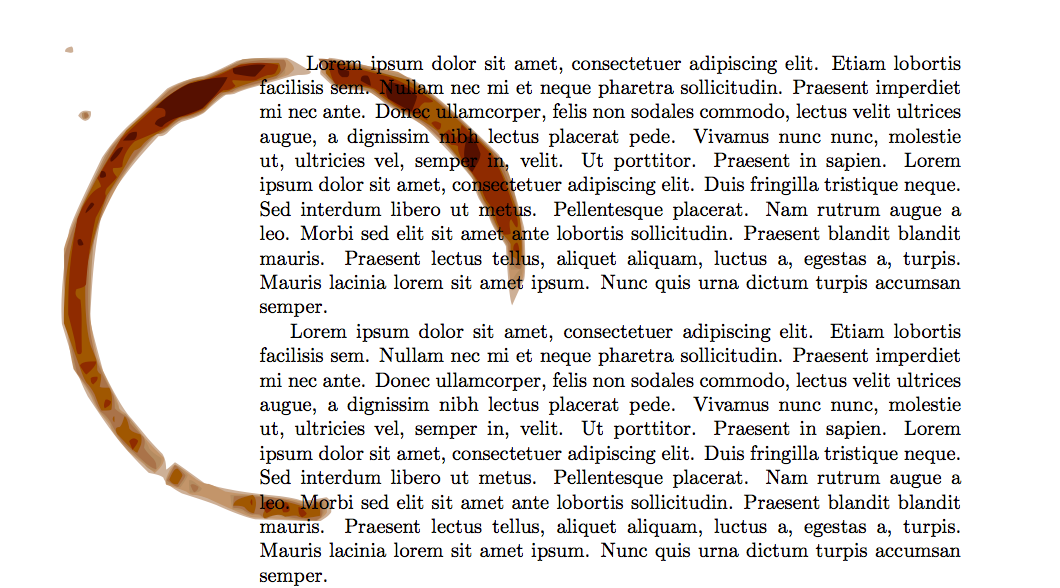

In [ ]:
# OpenCV: Load & display an image
img_cv = cv2.imread(image_address)  # Read image
cv2_imshow(img_cv)  # Show image

NumPy Image Shape: (588, 1060, 3)


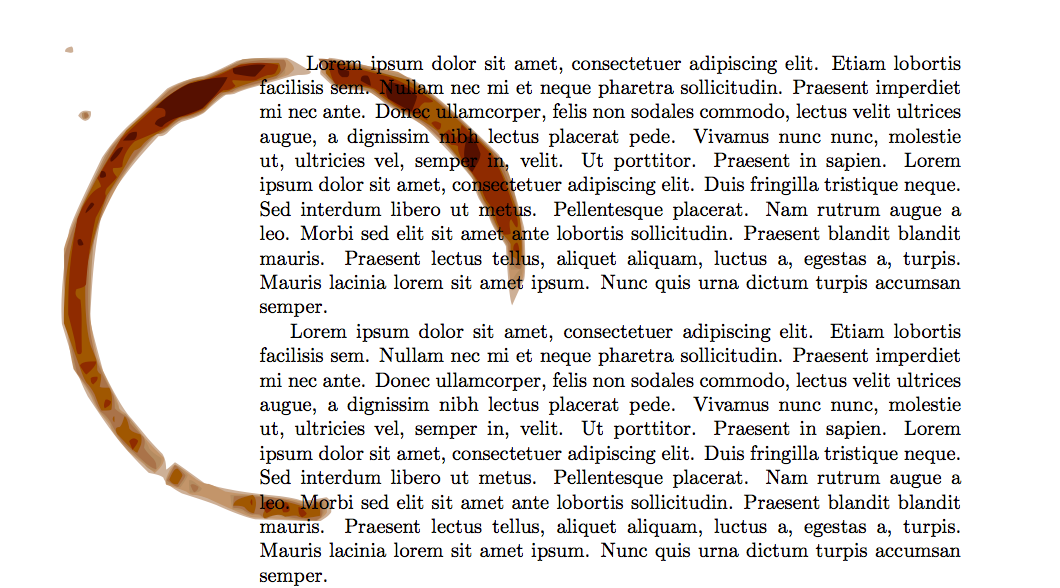

In [ ]:
# PIL (Pillow): Load & display an image
img_pil = Image.open(image_address)
# NumPy: Convert image to array and print shape
img_np = np.array(img_pil)
print("NumPy Image Shape:", img_np.shape)

display(img_pil)

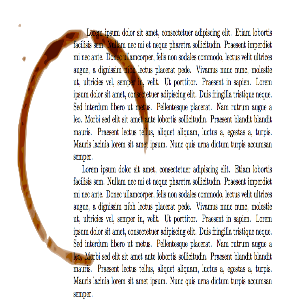

In [ ]:
# Resize image to 300x300 pixels
resized = cv2.resize(img_cv, (300, 300))

# Display resized image
cv2_imshow(resized)

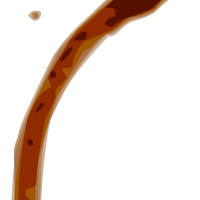

In [ ]:
# Crop a region (x: 50-250, y: 100-300)
cropped = img_cv[100:300, 50:250]

# For colab use
cv2_imshow(cropped)

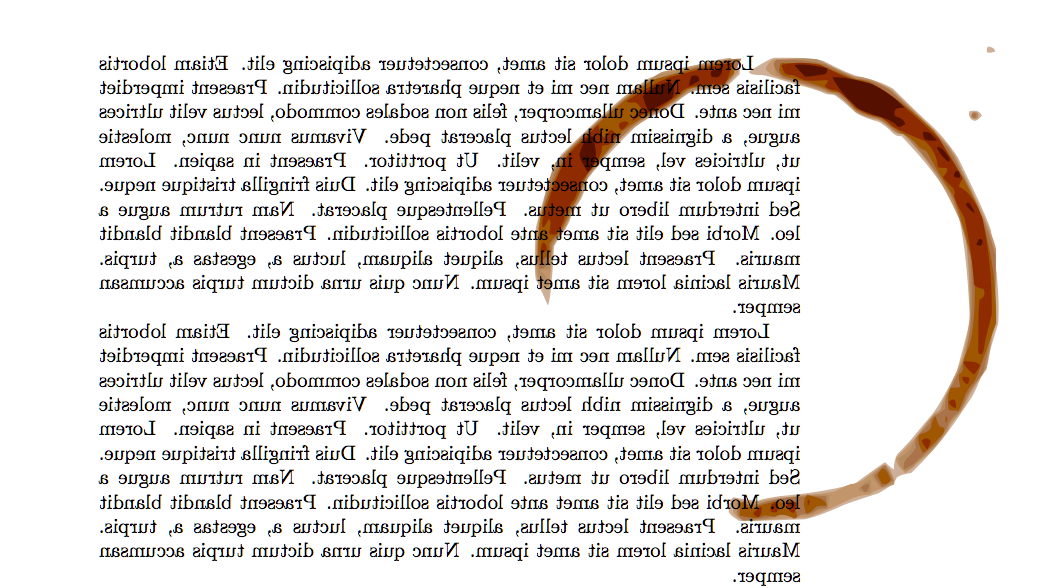

In [ ]:
flipped = cv2.flip(img_cv, 1)  # Horizontal flip

# For colab use
cv2_imshow(flipped)

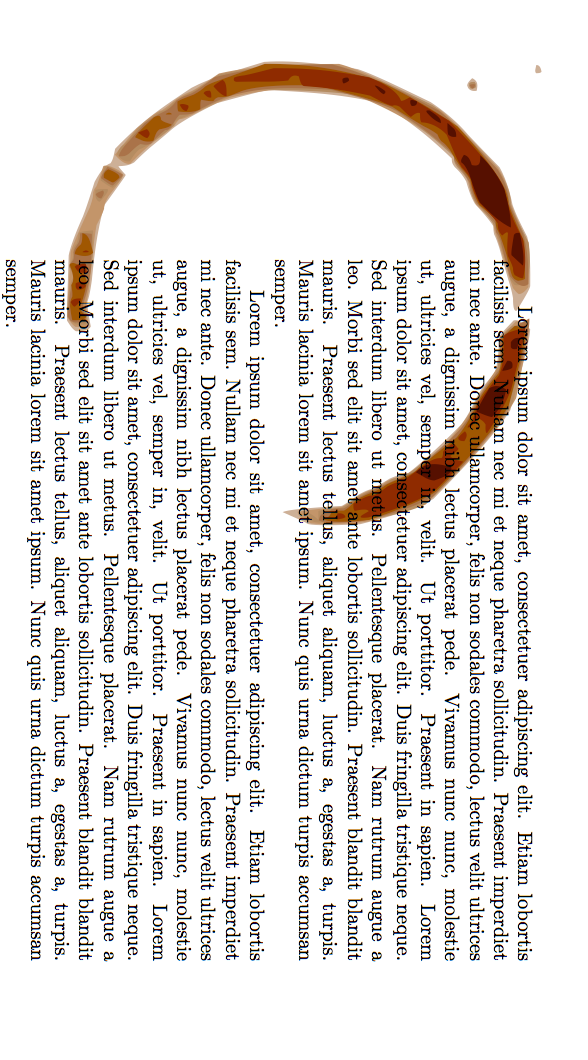

In [ ]:
rotated = cv2.rotate(img_cv, cv2.ROTATE_90_CLOCKWISE)

# For colab use
cv2_imshow(rotated)

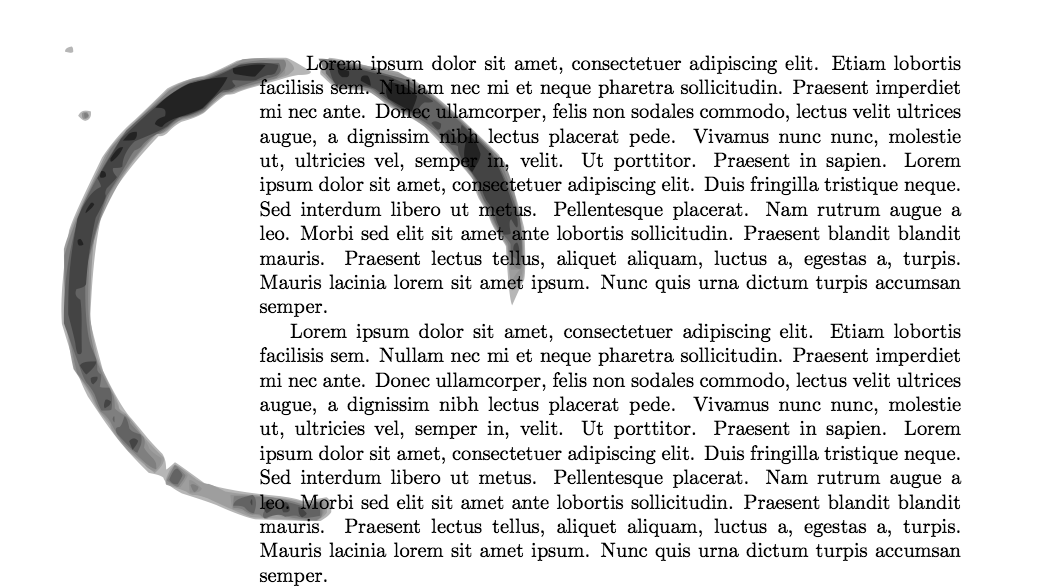

In [ ]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# For colab use
cv2_imshow(gray)

In [ ]:
cv2.imwrite("processed_image.jpg", gray)  # Save grayscale version
cv2.imwrite("resized_image.png", resized)  # Save resized image

True

In [ ]:
def read_image_from_google_drive(url):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        image = Image.open(BytesIO(response.content))
        return image

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None



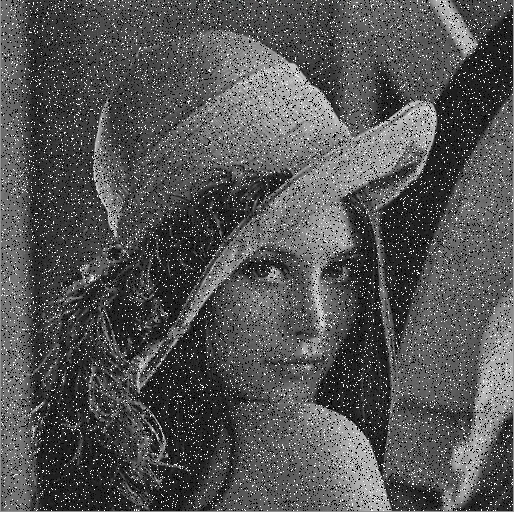

In [ ]:
# Lenna with salt pepper noise
image_url = "https://drive.google.com/uc?export=download&id=1uvXDBdQI0h7V7IhnYJi1g8ChQmAU3F8C"

image = read_image_from_google_drive(image_url)

# Convert PIL Image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Display the image using cv2_imshow
cv2_imshow(image_cv2)

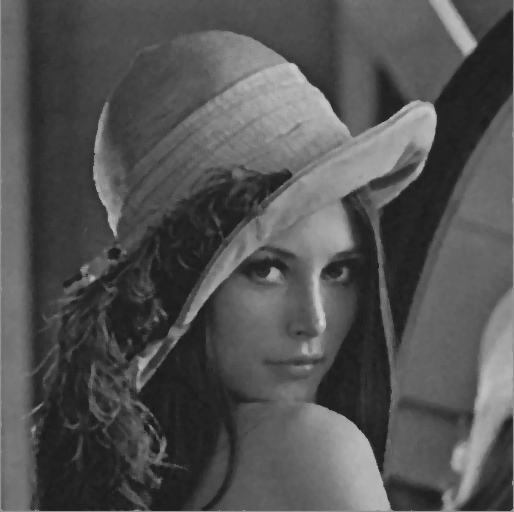

In [ ]:
# Apply Median Filtering
median = cv2.medianBlur(image_cv2, 5)

# Show results
cv2_imshow(median)


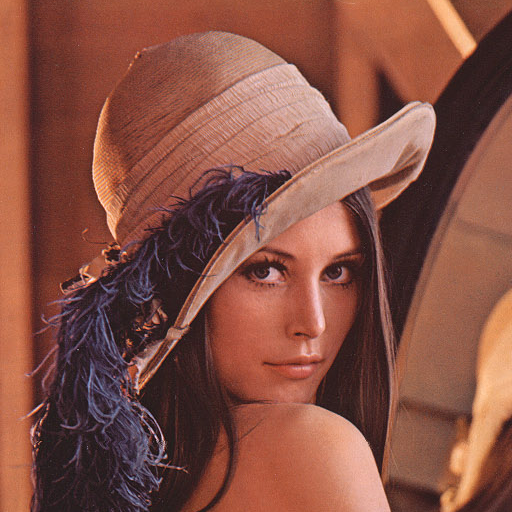

In [ ]:
# Lenna original image
image_url = "https://drive.google.com/uc?export=download&id=1sD09kBlScXkOjxaqvzlx9bWTd5AHXl2K"

image = read_image_from_google_drive(image_url)

# Convert PIL Image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Display the image using cv2_imshow
cv2_imshow(image_cv2)

In [ ]:
# Convert the image to grayscale first
gray_image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

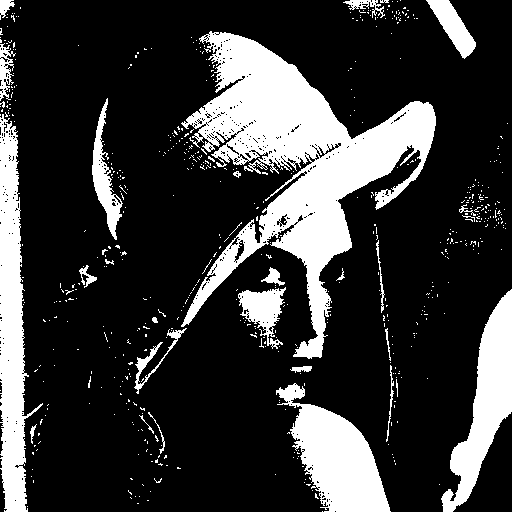

In [ ]:
# Apply simple thresholding
_, thresh_simple = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Show results
cv2_imshow(thresh_simple)

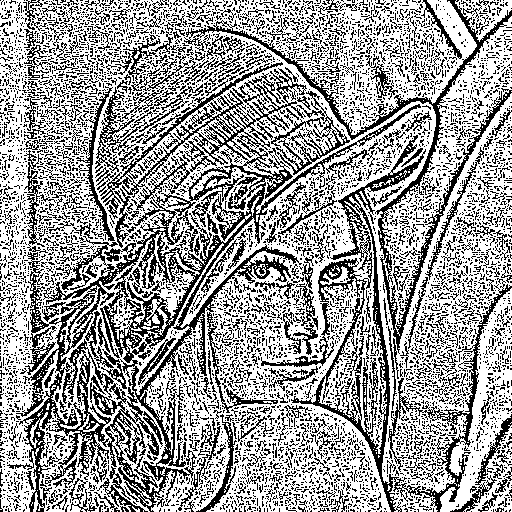

In [ ]:
# Apply adaptive thresholding
thresh_adaptive = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Show results
cv2_imshow(thresh_adaptive)

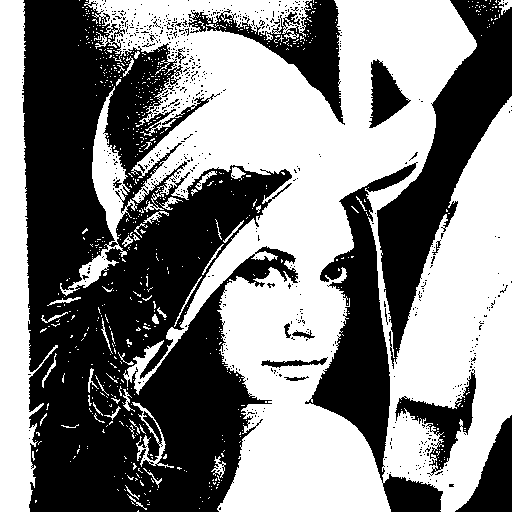

In [ ]:
# Apply Otsu’s Binarization
_, thresh_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Show results
cv2_imshow(thresh_otsu)

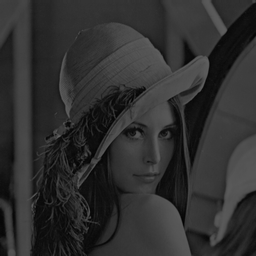

In [ ]:
# Lenna low contrast image
image_url = "https://drive.google.com/uc?export=download&id=1MNmFCKnT8DxfID2mRbNPDnhPpSZUiVgk"

image = read_image_from_google_drive(image_url)

# Convert PIL Image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert the image to grayscale first
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

# Display the image using cv2_imshow
cv2_imshow(image_cv2)

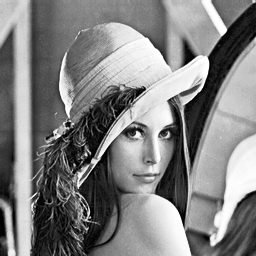

In [ ]:
# Apply Histogram Equalization
hist_eq = cv2.equalizeHist(image_cv2)

# Display the image using cv2_imshow
cv2_imshow(hist_eq)

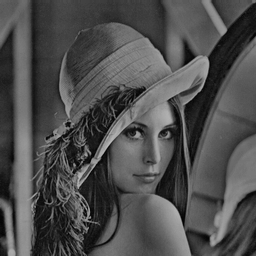

In [ ]:
# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_cv2)

# Display the image using cv2_imshow
cv2_imshow(clahe_img)

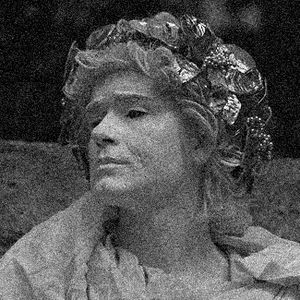

In [ ]:
# Lenna noisy
image_url = "https://drive.google.com/uc?export=download&id=1VOhAPHcPt_JojUyQdTkH77Vru-E_06qv"

image = read_image_from_google_drive(image_url)

# Convert PIL Image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)


# Display the image using cv2_imshow
cv2_imshow(image_cv2)

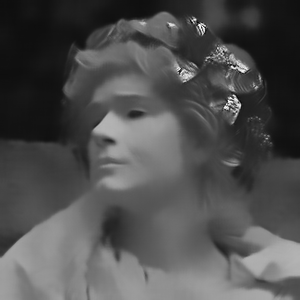

In [ ]:
# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(image_cv2, None, 30, 7, 21)

# Display the image using cv2_imshow
cv2_imshow(denoised)